# Display results


### Dependencies

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import csv files

In [26]:
df_neural = pd.read_csv('model_performance/model_performance_100.csv_0_0_0.csv', delimiter=',')
df_no_param = pd.read_csv('model_performance/model_performance_no_prams.csv_0_0_0.csv', delimiter=',')
df_prophet = pd.read_csv('model_performance/model_performance.csv_0_0_0.csv', delimiter=',')

### Utils

In [73]:
def display_results(df, threshold):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['mape'])
    plt.title("Box Plot of MAPE")
    plt.xlabel("MAPE")
    plt.show()

    df_display = df[df['mape'] <= threshold]


    print(f"Num values dropped: {len(df) - len(df_display)}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_display['mape'])
    plt.title("Box Plot of MAPE")
    plt.xlabel("MAPE")
    plt.show()


    sns.displot(df_display['mape'], kde=True, bins=30, height=6, aspect=1.5)
    plt.xlabel("MAPE")
    plt.ylabel("Frequency")
    plt.title("Distribution of MAPE")

    median_value = df['mape'].median()
    plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
    plt.legend()
    
    plt.show()

    print(f"Average MAPE: {round(df['mape'].mean(),2)}")

## Comparing Prophet and Prophet no params 

Prophet no params is the default model where I did not select any hyperparamters. 
The other Prophet was a model optimised on the company with the largest amount of company data. 

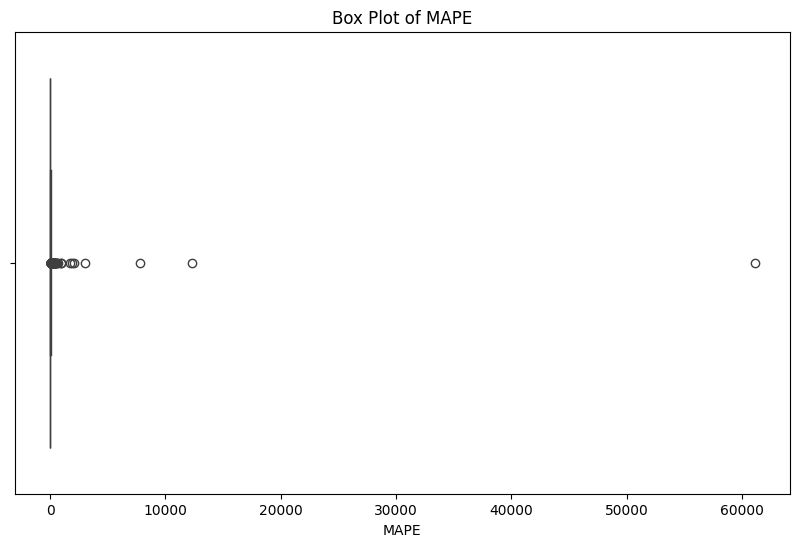

Num values dropped: 14


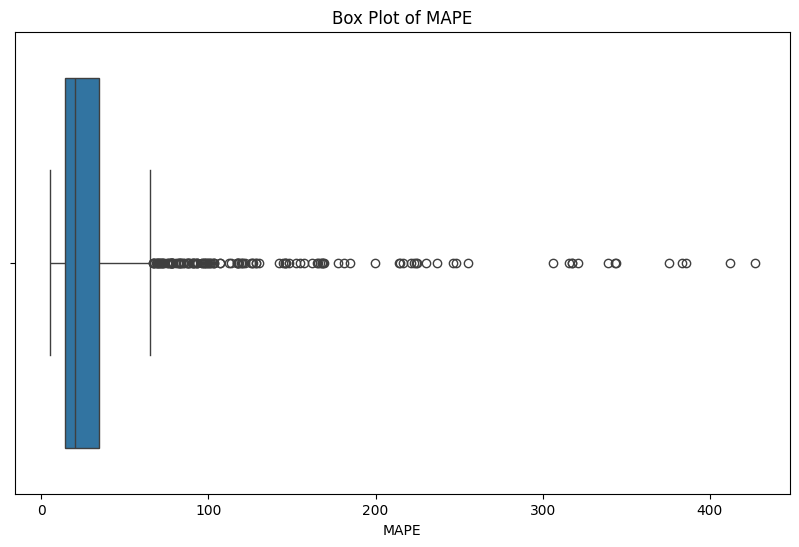

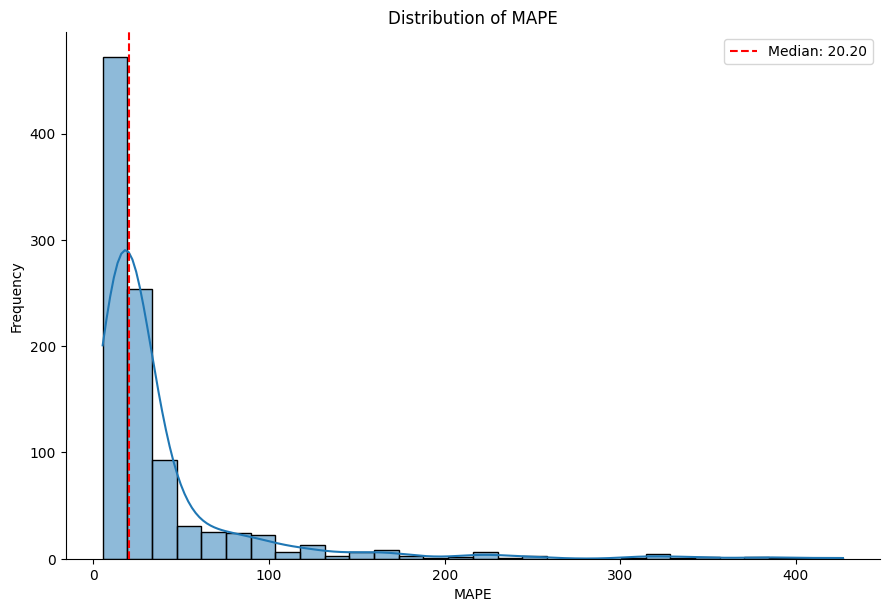

Average MAPE: 131.48


In [80]:
display_results(df_no_param , 450)

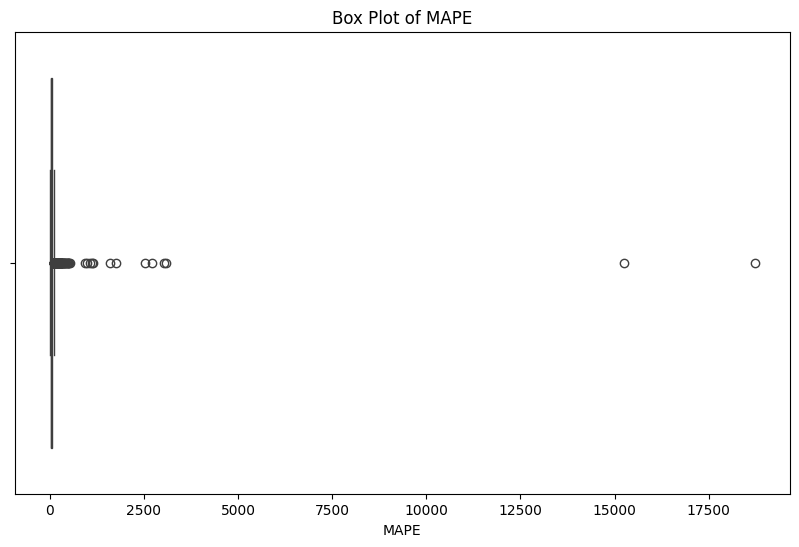

Num values dropped: 13


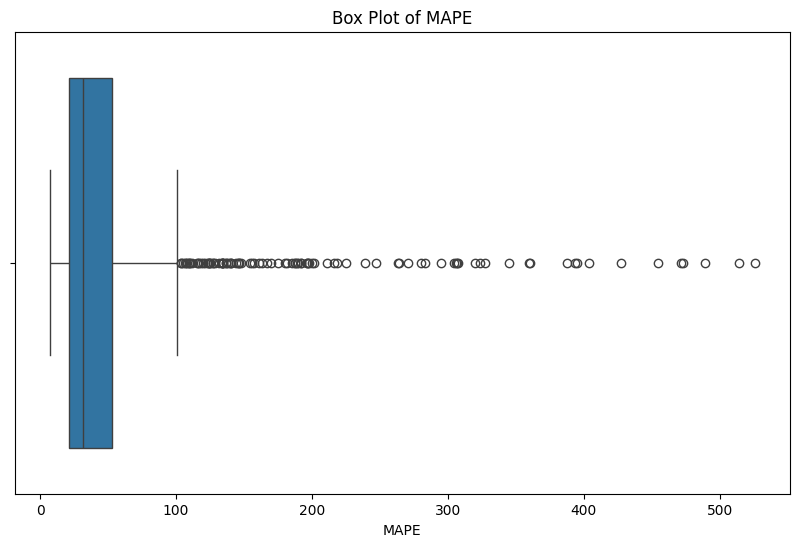

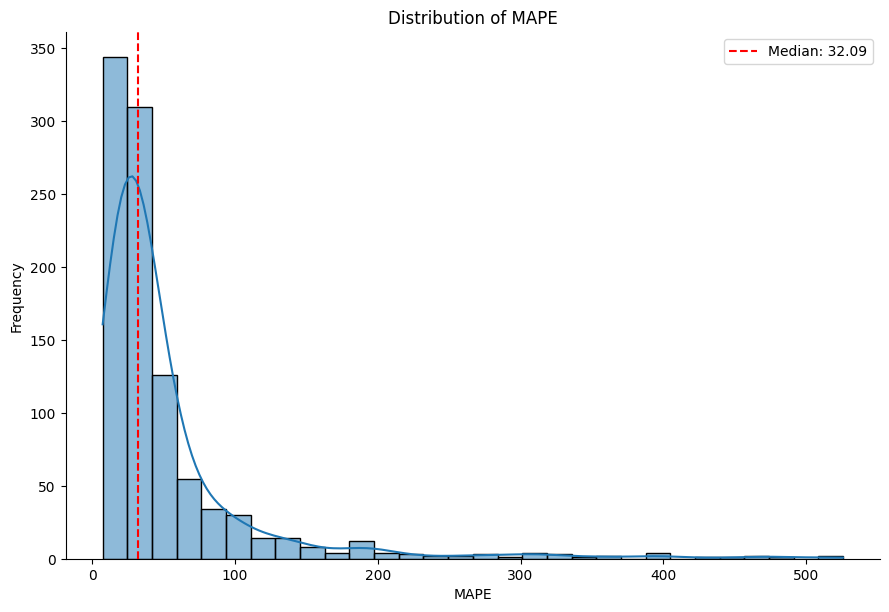

Average MAPE: 105.5


In [79]:
display_results(df_prophet , 600)

## Comparing the top 100 companies for prophet no params, prophet optimised, and neural prophet

### Neural prophet

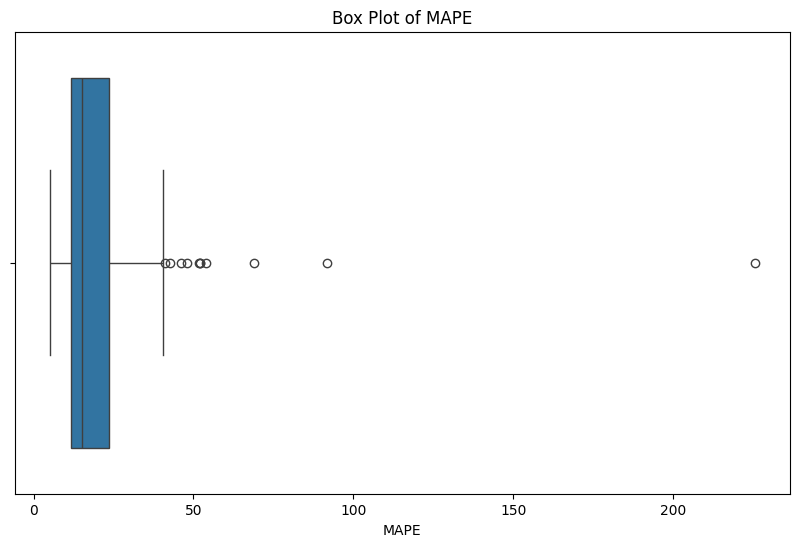

Num values dropped: 0


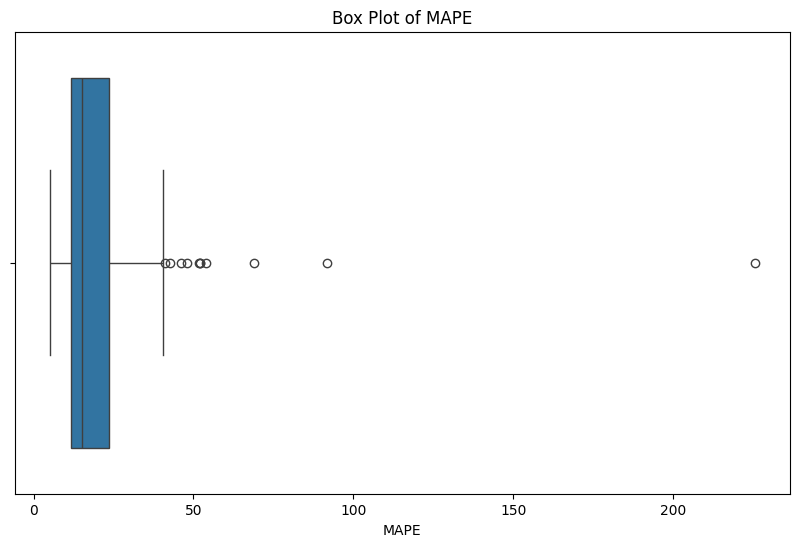

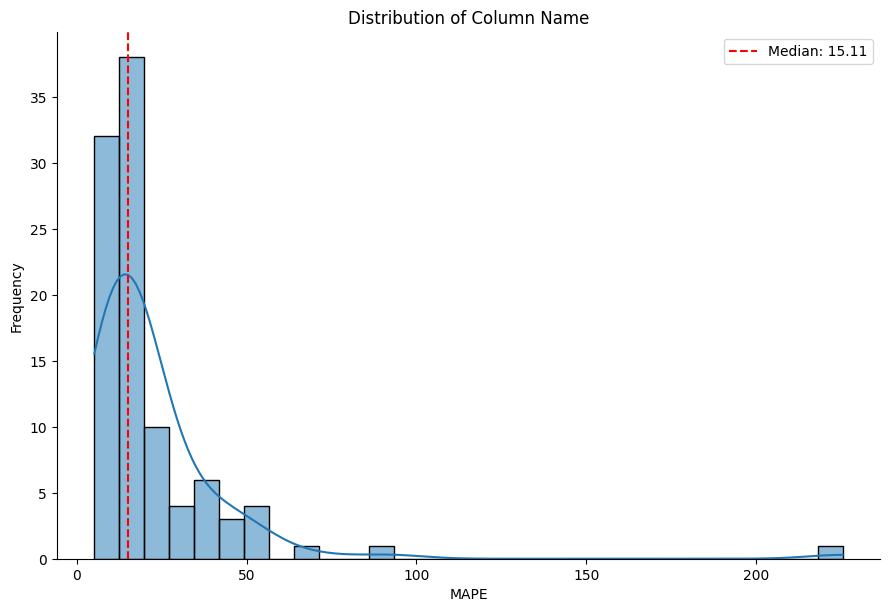

Avergage MAPE: 22.186999999999998


In [69]:
display_results(df_neural, 300000)

### Non optimised prophet

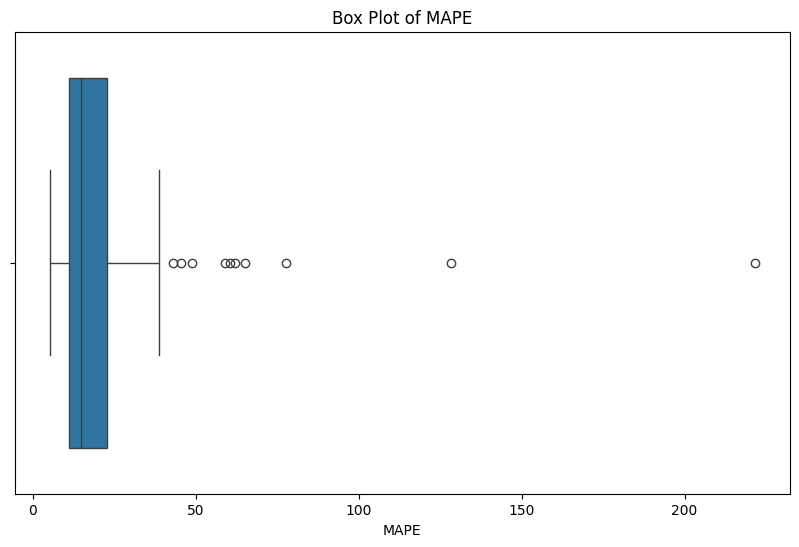

Num values dropped: 0


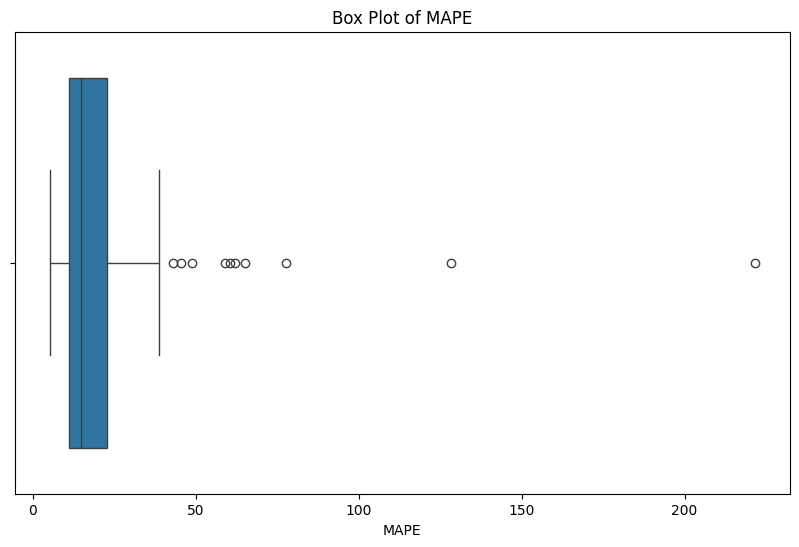

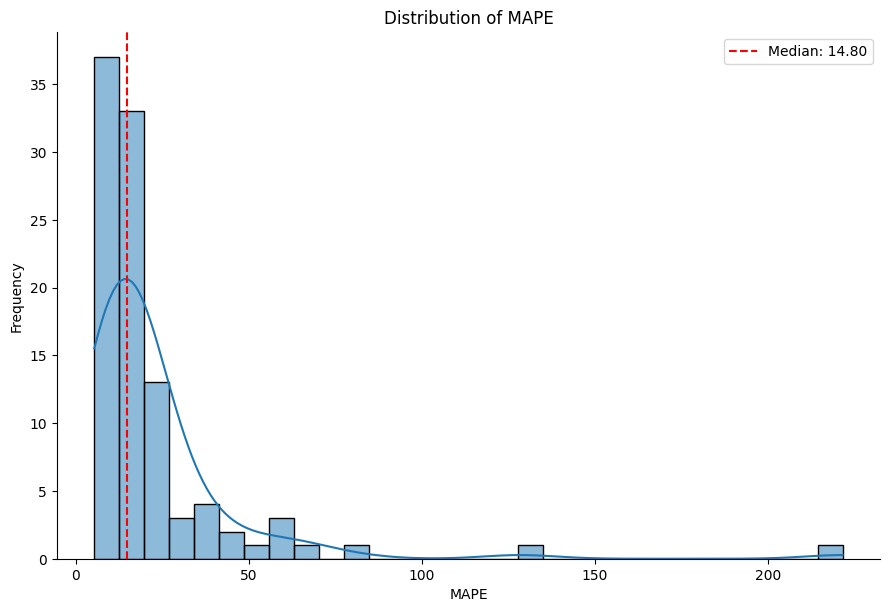

Average MAPE: 22.3


In [74]:
display_results(df_no_param[:100], 300000)

### Optimised Prophet

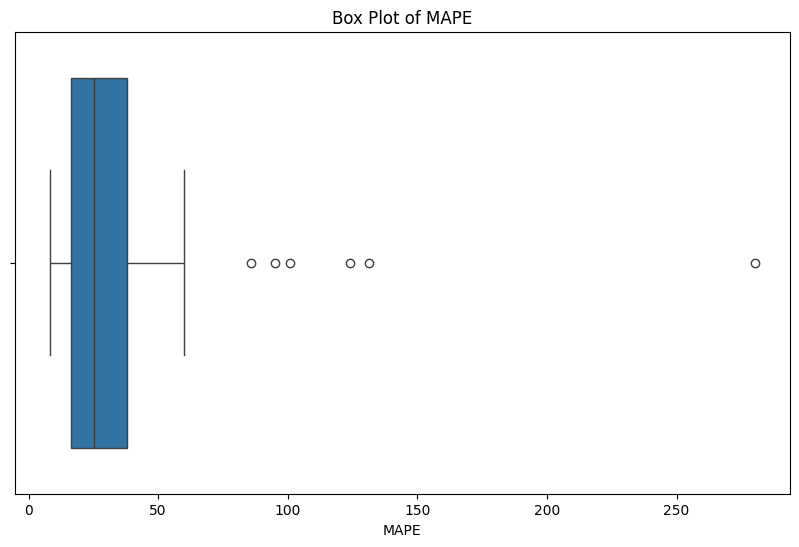

Num values dropped: 0


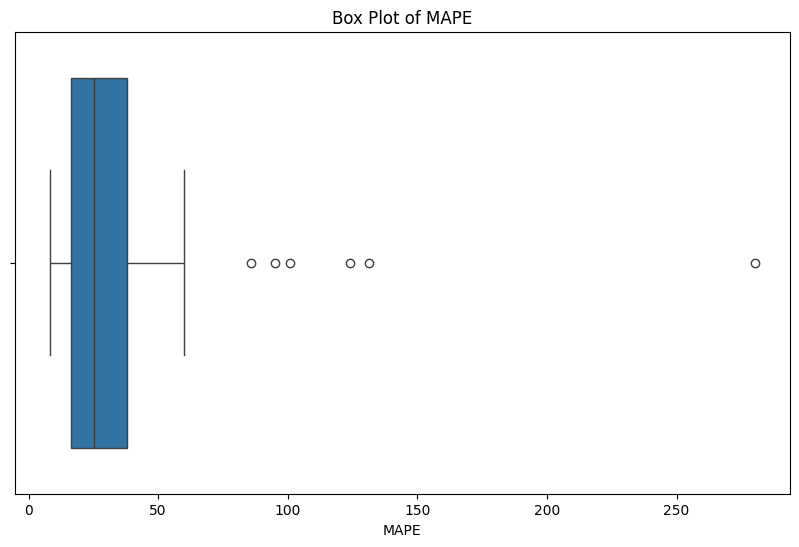

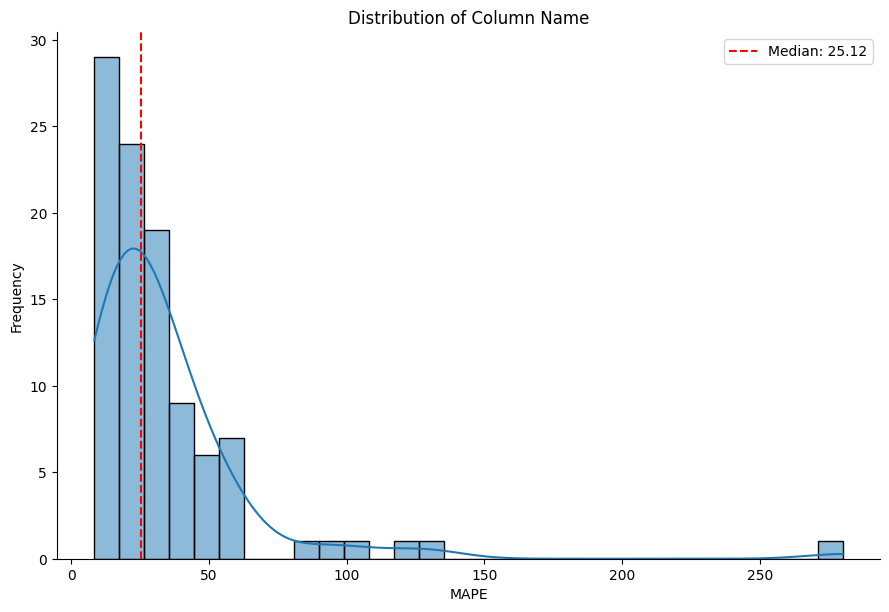

Average MAPE: 33.55


In [72]:
display_results(df_prophet[:100], 30000)

## Overall results

#### Top 100

In [75]:
print(f"Neural prophet average MAPE: {round(df_neural['mape'].mean(),2)}")
print(f"Prophet optimised average MAPE: {round(df_prophet['mape'][:100].mean(),2)}")
print(f"Prophet non optimised average MAPE: {round(df_no_param['mape'][:100].mean(),2)}")

Neural prophet average MAPE: 22.19
Prophet optimised average MAPE: 33.55
Prophet non optimised average MAPE: 22.3


### Top 1000

In [76]:
print(f"Prophet optimised average MAPE: {round(df_prophet['mape'].mean(),2)}")
print(f"Prophet non optimised average MAPE: {round(df_no_param['mape'].mean(),2)}")

Prophet optimised average MAPE: 105.5
Prophet non optimised average MAPE: 131.48


## Time To train

In [85]:
def display_train_time(df):

    df['train_time'].plot()

    sns.displot(df['train_time'], kde=True, bins=30, height=6, aspect=1.5)
    plt.xlabel("Training")
    plt.ylabel("Frequency")
    plt.title("Distribution of Training Time")

    median_value = df['train_time'].mean()
    plt.axvline(median_value, color='red', linestyle='--', label=f'Mean: {median_value:.2f}')
    plt.legend()
        
    plt.show()

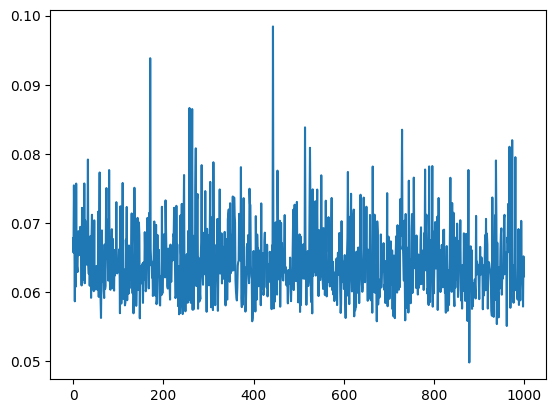

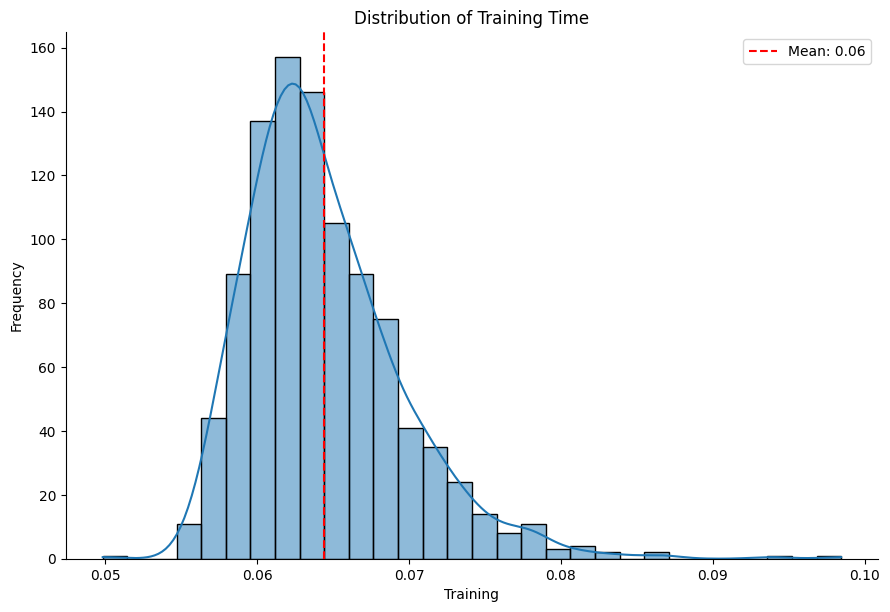

In [86]:
display_train_time(df_no_param)

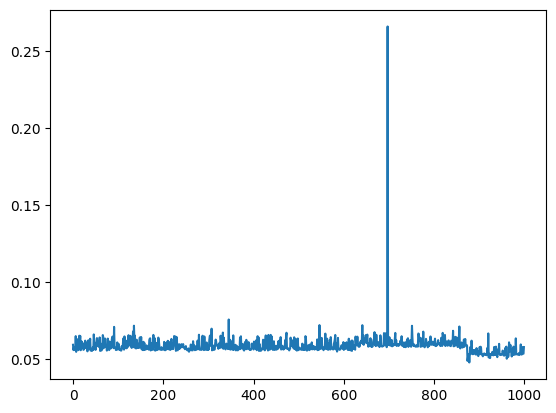

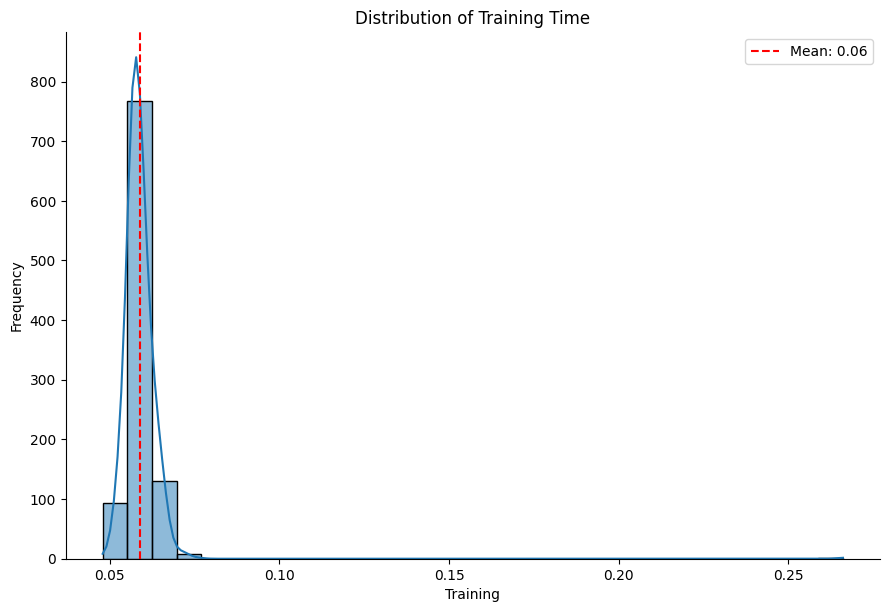

In [87]:
display_train_time(df_prophet)

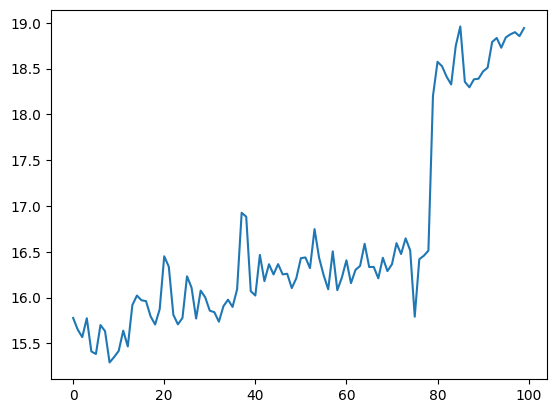

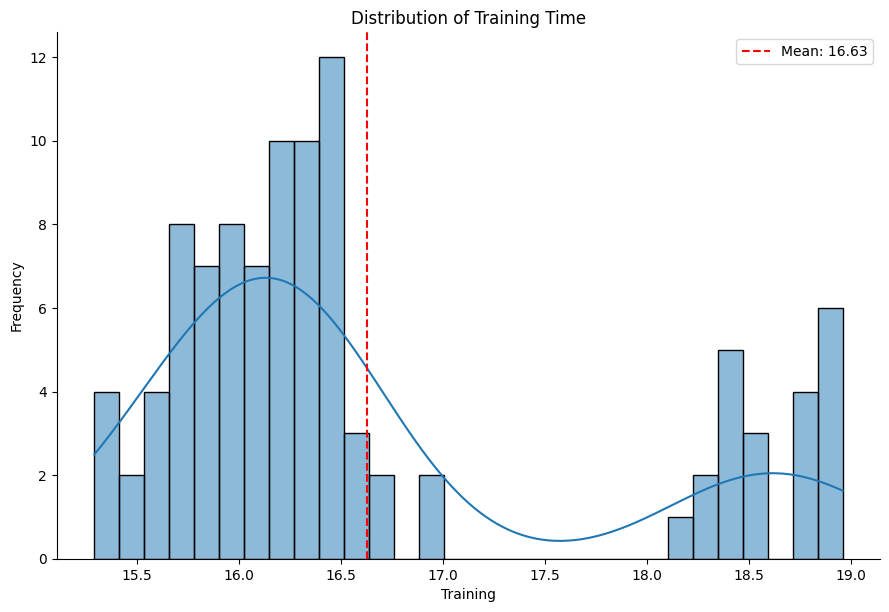

In [88]:
display_train_time(df_neural)

In [89]:
print(df_prophet['test_time'].mean())

0.041110185861519995
